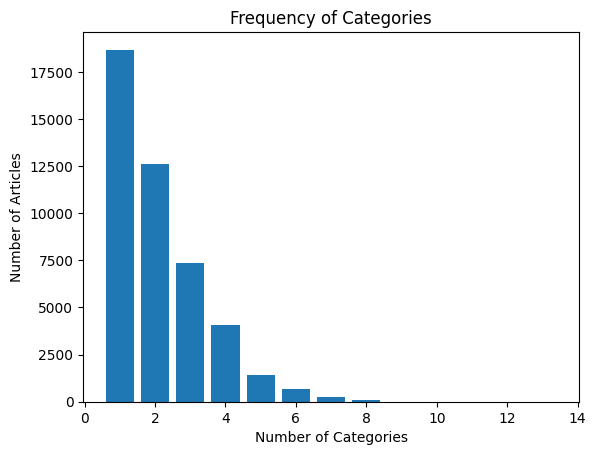

11**: 4821
19**: 3265
23**: 4017
31**: 1919
catLinks.html


In [18]:
import pandas as pd
from matplotlib import pyplot as plt
from collections import defaultdict #defaults dict entry to 0
from pyvis.network import Network
import math
import random

# Initialize
catFile = pd.read_csv('ASJC_catcode.csv', encoding ='latin-1')
journalFile = pd.read_csv('ASJC_journals.csv', encoding ='latin-1')
topCats = defaultdict(int) # All the top level categories in the database (i.e. 11**, 12**). Also contains the frequency of each as its item
allCats = defaultdict(int) # The frequency of each non-"top-level" category
mainCats =  ['11**', '19**', '23**', '31**'] # The main categories pertaining to the climate change topic
journalCats = defaultdict(int) # The frequency of each # of linked categories for a single journal

catNetEdges = defaultdict(int)
for catCodes in journalFile['All Science Journal Classification Codes (ASJC)']:
    delim = '; '
    catCodes = str(catCodes)
    ASJC = catCodes.split(delim)
    journalCats[len(ASJC)] += 1
    for i, code in enumerate(ASJC):
        # Loads the base dictionaries
        if code[:2] != "na":
            allCats[code] += 1
            topCats[code[:2]+"**"] += 1
            for linkedCode in ASJC[i+1:]:
                if code[:2] != linkedCode[:2] and code[:2] != "na":
                    catNetEdges[(code[:2]+"**", linkedCode[:2]+"**")] += 1

# Bar chart: Displays the information of journalCats
plt.bar(journalCats.keys(), journalCats.values())
plt.xlabel('Number of Categories')
plt.ylabel('Number of Articles')
plt.title('Frequency of Categories')
plt.show()# Print the counts for the main categories

for cat in mainCats: print(f"{cat}: {topCats[cat]}")

# Function to generate a random color
def random_color():
    return "#{:06x}".format(random.randint(0, 0xFFFFFF))
# Function to calculate the average color
def average_color(color1, color2):
    # Convert hex colors to RGB tuples
    r1, g1, b1 = int(color1[1:3], 16), int(color1[3:5], 16), int(color1[5:], 16)
    r2, g2, b2 = int(color2[1:3], 16), int(color2[3:5], 16), int(color2[5:], 16)
    # Calculate average RGB values
    avg_r = (r1 + r2) // 2
    avg_g = (g1 + g2) // 2
    avg_b = (b1 + b2) // 2
    # Convert average RGB values to hex color
    return "#{:02x}{:02x}{:02x}".format(avg_r, avg_g, avg_b)

# Prompt user to input top-level categories
user_input = input("Enter top-level categories (separated by comma), or press Enter to include all: ")
selected_categories = user_input.split(',') if user_input else list(topCats.keys())

catNet = Network(height="1200px", width="100%", bgcolor="#222222", font_color="white") 
catNetNodeColor = {}
for cat in selected_categories:
    if cat in topCats:
        catNetNodeColor[cat] = random_color()
        catNet.add_node(cat, size=1 + math.log(topCats[cat] + 1), color=catNetNodeColor[cat])

catNetMax = max(catNetEdges.values()) # Max amount of connections of a single node <=> node
for (source, target), count in catNetEdges.items():
    if source in selected_categories and target in selected_categories:
        catNet.add_edge(source, target, width=1 + 10 * math.log(count + 1) / math.log(catNetMax + 1), color=average_color(catNetNodeColor.get(source, '#ffffff'), catNetNodeColor.get(target, '#ffffff')))


# Visualize the network graph
catNet.toggle_physics(False)
catNet.show_buttons(filter_=["nodes"])
catNet.show('catLinks.html',notebook=False)